In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

#load sample data
bc_data = load_breast_cancer()
bc_features = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
bc_classes = pd.DataFrame(bc_data.target, columns=['IsMalignant'])

# build featureset and response class labels 
X = bc_features
y = np.array(bc_classes).T[0]
print('Feature set shape:', X.shape)
print('Response class shape:', y.shape)

Feature set shape: (569, 30)
Response class shape: (569,)


# Univariate Statistics

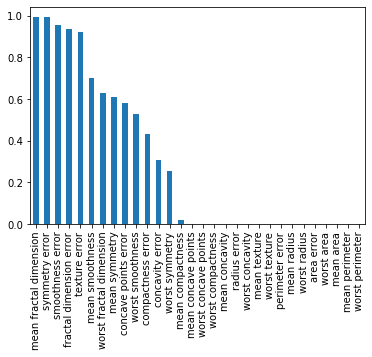

In [4]:
from sklearn.feature_selection import chi2

#chi2 api returns two arrays: chi2-values and p-values
chi_scores = chi2(X, y)

#we can plot the p-values to show us independence
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False).plot.bar();

Features that have higher p-values are independent of the response variable, and cannot be considered for model training

In [12]:
from sklearn.feature_selection import SelectKBest

In [ ]:
f_test = SelectKBest(f_classif, k=4

In [6]:
#K Best using chi2 as the score function
from sklearn.feature_selection import chi2, SelectKBest

skb = SelectKBest(score_func=chi2, k=10)
skb.fit(X, y)

NameError: name 'bc_X' is not defined

In [ ]:
feature_scores = [(item, score) for item, score in zip(bc_data.feature_names, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

In [ ]:
select_features_kbest = skb.get_support()
feature_names_kbest = bc_data.feature_names[select_features_kbest]
feature_subset_df = bc_features[feature_names_kbest]
bc_SX = np.array(feature_subset_df)
print(bc_SX.shape)
print(feature_names_kbest)

In [ ]:
np.round(feature_subset_df.iloc[20:25], 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# build logistic regression model
lr = LogisticRegression()

# evaluating accuracy for model built on full featureset
full_feat_acc = np.average(cross_val_score(lr, bc_X, bc_y, scoring='accuracy', cv=5))
# evaluating accuracy for model built on selected featureset
sel_feat_acc = np.average(cross_val_score(lr, bc_SX, bc_y, scoring='accuracy', cv=5))

print('Model accuracy statistics with 5-fold cross validation')
print('Model accuracy with complete feature set', bc_X.shape, ':', full_feat_acc)
print('Model accuracy with selected feature set', bc_SX.shape, ':', sel_feat_acc)

In [ ]:
#Recursive Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(bc_X, bc_y)

In [ ]:
select_features_rfe = rfe.get_support()
feature_names_rfe = bc_data.feature_names[select_features_rfe]
print(feature_names_rfe)

rfe_subset_df = bc_features[feature_names_rfe]
bc_SX2 = np.array(feature_subset_df)

In [ ]:
print(feature_names_kbest)

In [ ]:
# evaluating accuracy for model built on K-best selected featureset
sel_feat_acc = np.average(cross_val_score(lr, bc_SX, bc_y, scoring='accuracy', cv=5))

#evaluating for model built on RFE selected featureset
rfe_feat_acc = np.average(cross_val_score(lr, bc_SX2, bc_y, scoring='accuracy', cv=5))


print('Model accuracy statistics with 5-fold cross validation')
print('Model accuracy with KBest selected feature set', bc_SX.shape, ':', sel_feat_acc)
print('Model accuracy with RFE selected feature set', bc_SX2.shape, ':', rfe_feat_acc)

In [ ]:
#Model-based selection
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(bc_X, bc_y)

importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(bc_data.feature_names, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

In [ ]:
#write code to compare these features and the ones above - 
#be sure to index your sets/tuples to get feat names
feats = []
for feature in feature_importances:
    feats.append(feature[0])

Xrfc = bc_features[feats]
np.average(cross_val_score(lr, Xrfc, bc_y, scoring = "accuracy", cv = 5))